### Setup/Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

### Get Data

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### EDA

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Get list of unique values per feature

In [4]:
for col in list(df):
    print(f'Unique vals in {col}: {len(np.unique(df[col]))}')

Unique vals in fixed acidity: 96
Unique vals in volatile acidity: 143
Unique vals in citric acid: 80
Unique vals in residual sugar: 91
Unique vals in chlorides: 153
Unique vals in free sulfur dioxide: 60
Unique vals in total sulfur dioxide: 144
Unique vals in density: 436
Unique vals in pH: 89
Unique vals in sulphates: 96
Unique vals in alcohol: 65
Unique vals in quality: 6


##### Clean data

In [5]:
df = df[df['total sulfur dioxide']<200]

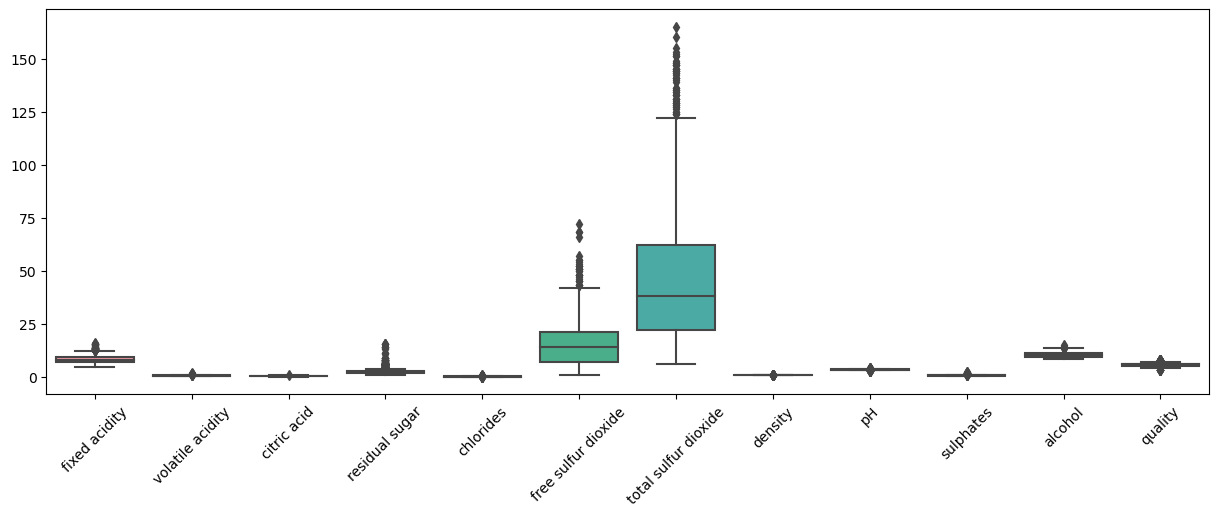

In [6]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

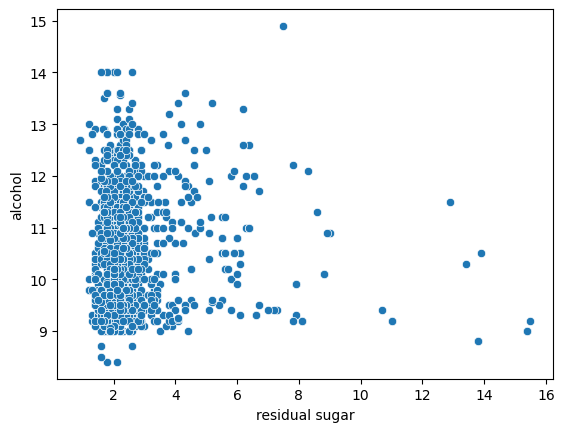

In [7]:
sns.scatterplot(x=df['residual sugar'], y=df['alcohol'])
plt.show()

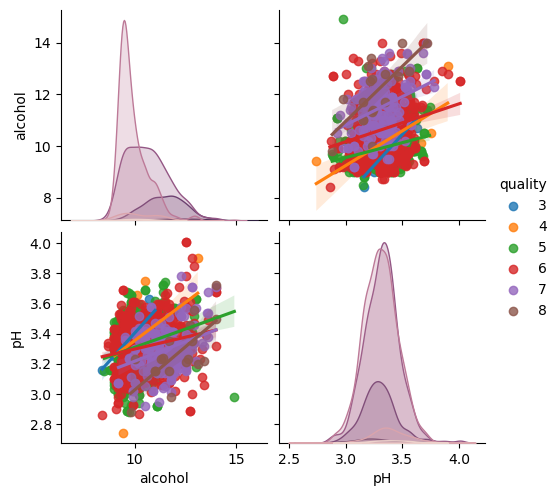

In [8]:
sns.pairplot(df[['alcohol', 'pH', 'quality']], kind='reg', hue='quality')
plt.show()

### t-test for acidity and wine quality

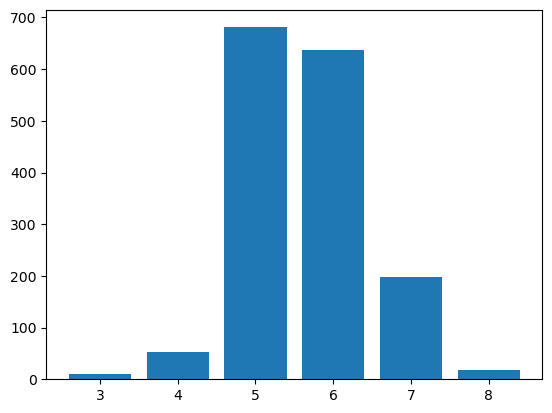

In [9]:
plt.bar(df['quality'].value_counts().index, df['quality'].value_counts().values)
plt.show()

Ttest_indResult(statistic=12.765504354353604, pvalue=1.215425804161403e-29)


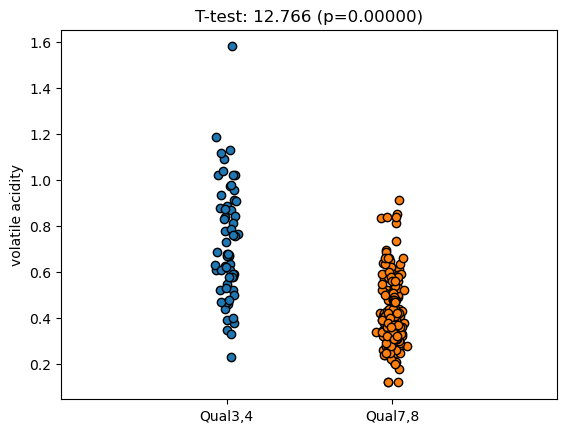

In [10]:
# variables
x = df['volatile acidity'][df['quality']<5]
y = df['volatile acidity'][df['quality']>6]

# gen t-test

ttest = stats.ttest_ind(x,y)
print(ttest)


# plot
plt.plot(
    np.random.randn(len(x))/30, x, 'o',
    np.random.randn(len(y))/30+1, y, 'o',
    markeredgecolor='k'
)

plt.xlim([-1,2])
plt.xticks([0,1], labels=['Qual3,4', 'Qual7,8'])
plt.ylabel('volatile acidity')
plt.title(f'T-test: {ttest[0]:.3f} (p={ttest[1]:.5f})' )
plt.show()

## Multivariate regression

In [11]:
y = df['quality']
X = df.drop(['quality'], axis=1)

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.30e-145
Time:                        10:00:20   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

##### Identify SS IVs

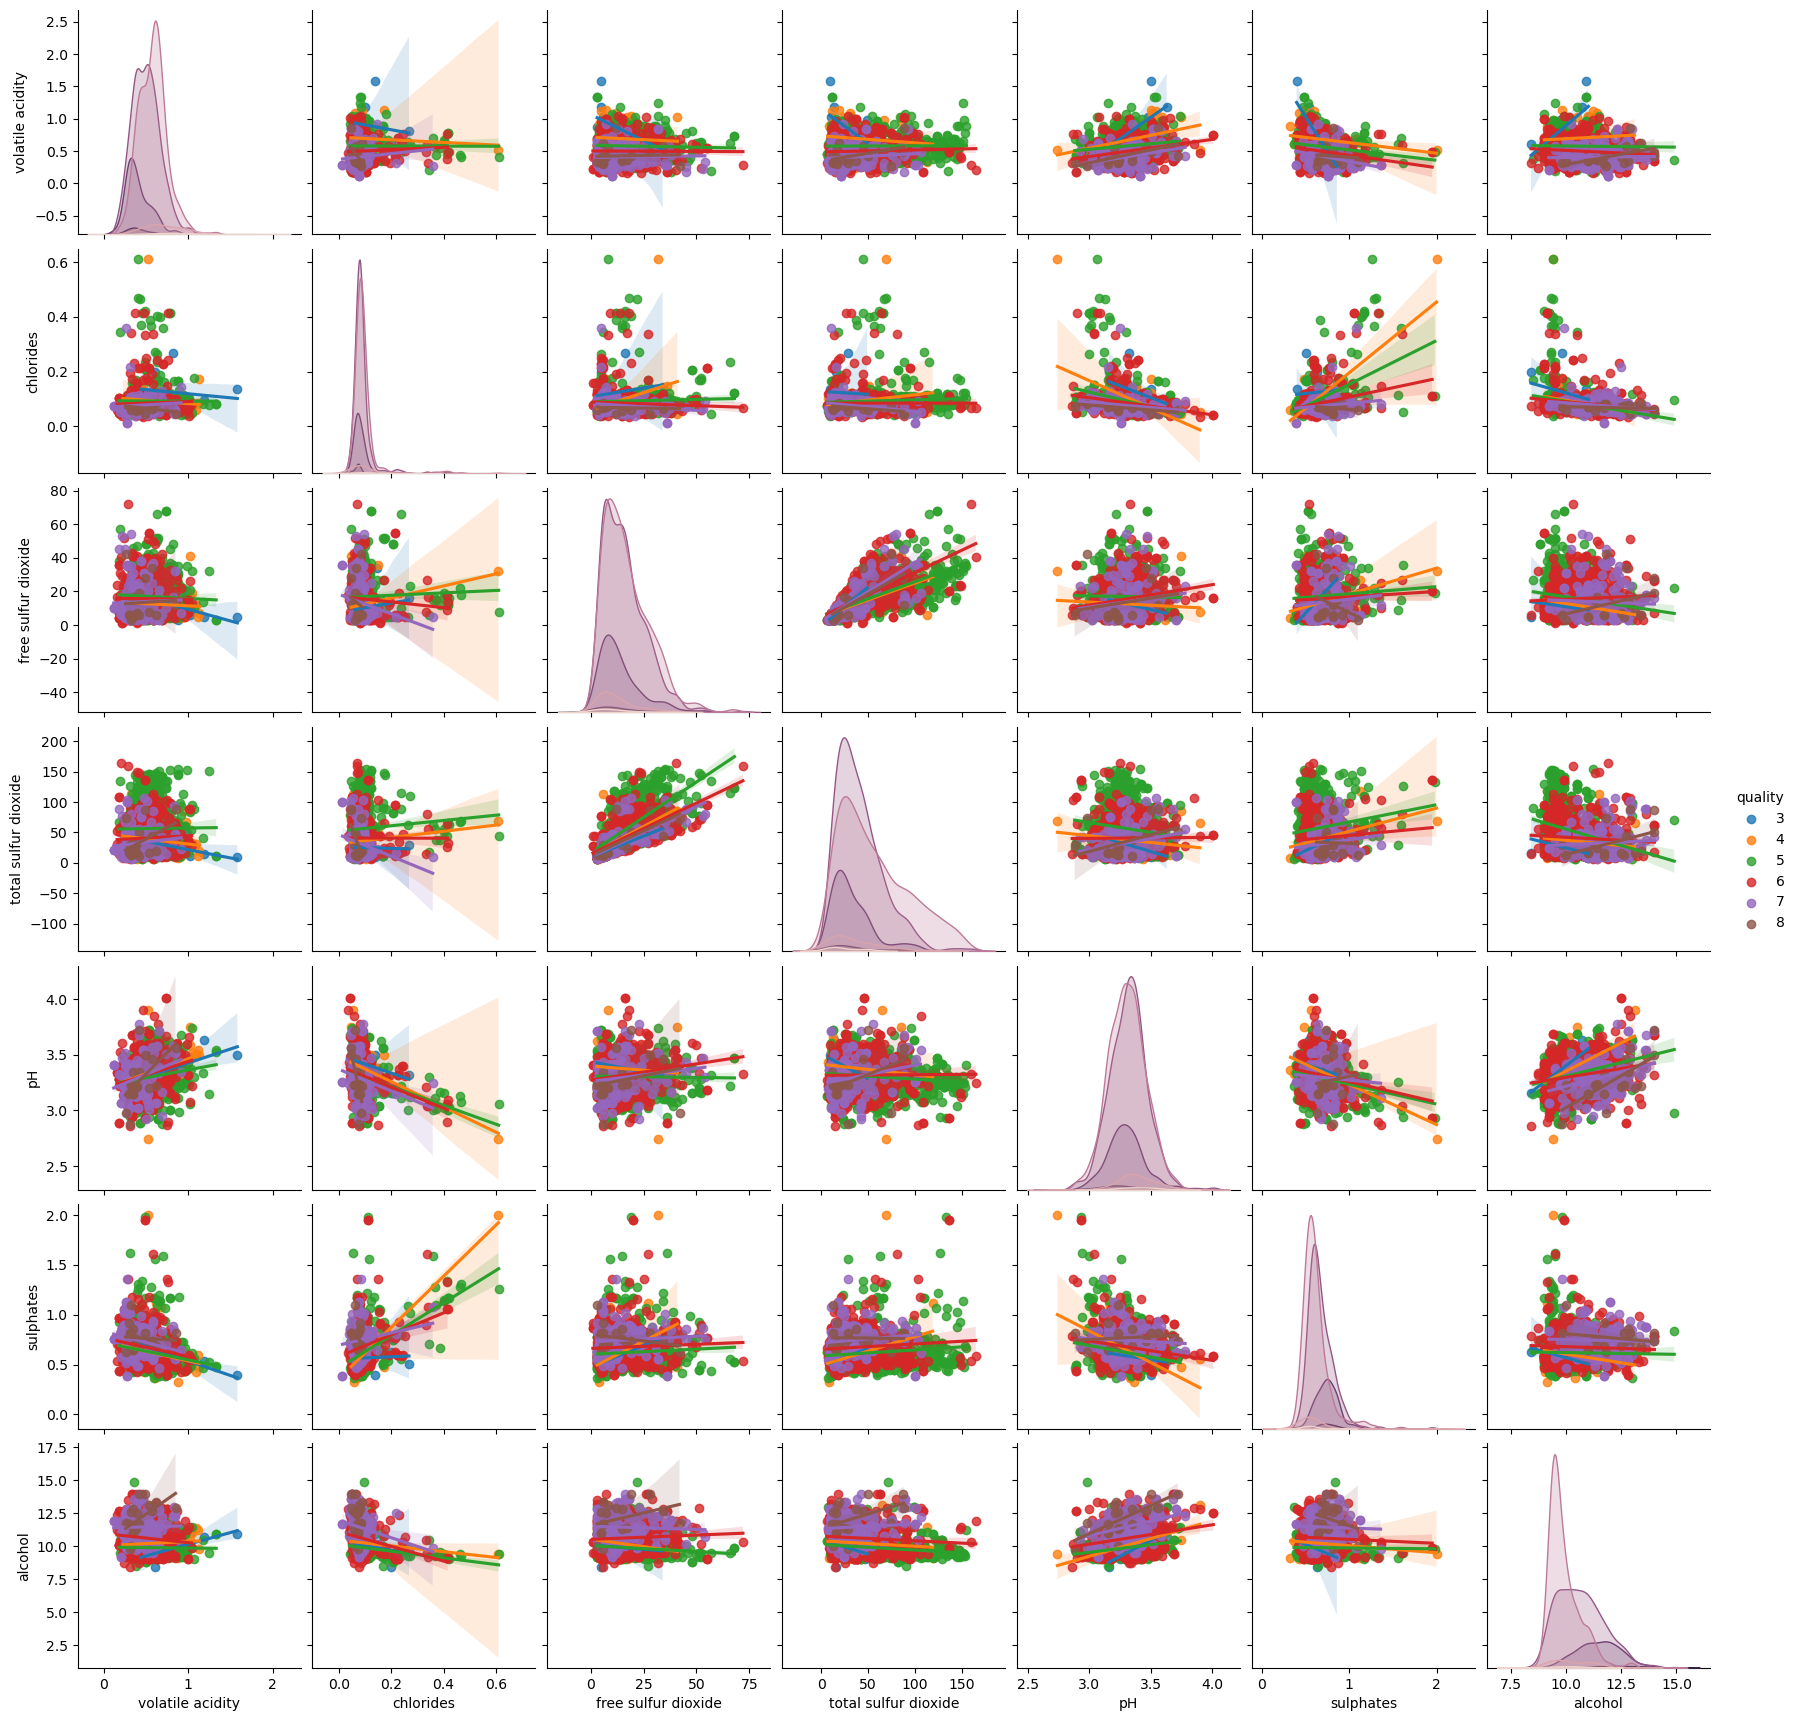

In [12]:
ss_ivs = list(model.pvalues[model.pvalues<0.05].keys())
ss_ivs.append('quality')
sns.pairplot(df[ss_ivs], kind='reg', hue='quality')

## Logistic regression

In [14]:
# binarize quality 
df['binquality']=df['quality']>df['quality'].mean()
X= df.drop(['quality', 'binquality'], axis=1)
y= df['binquality']
X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.516356
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1585
Method:                           MLE   Df Model:                           11
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.2525
Time:                        10:03:01   Log-Likelihood:                -824.62
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                1.953e-112
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   16.4787     80.100      0.206      0.837    -140.514     173.472

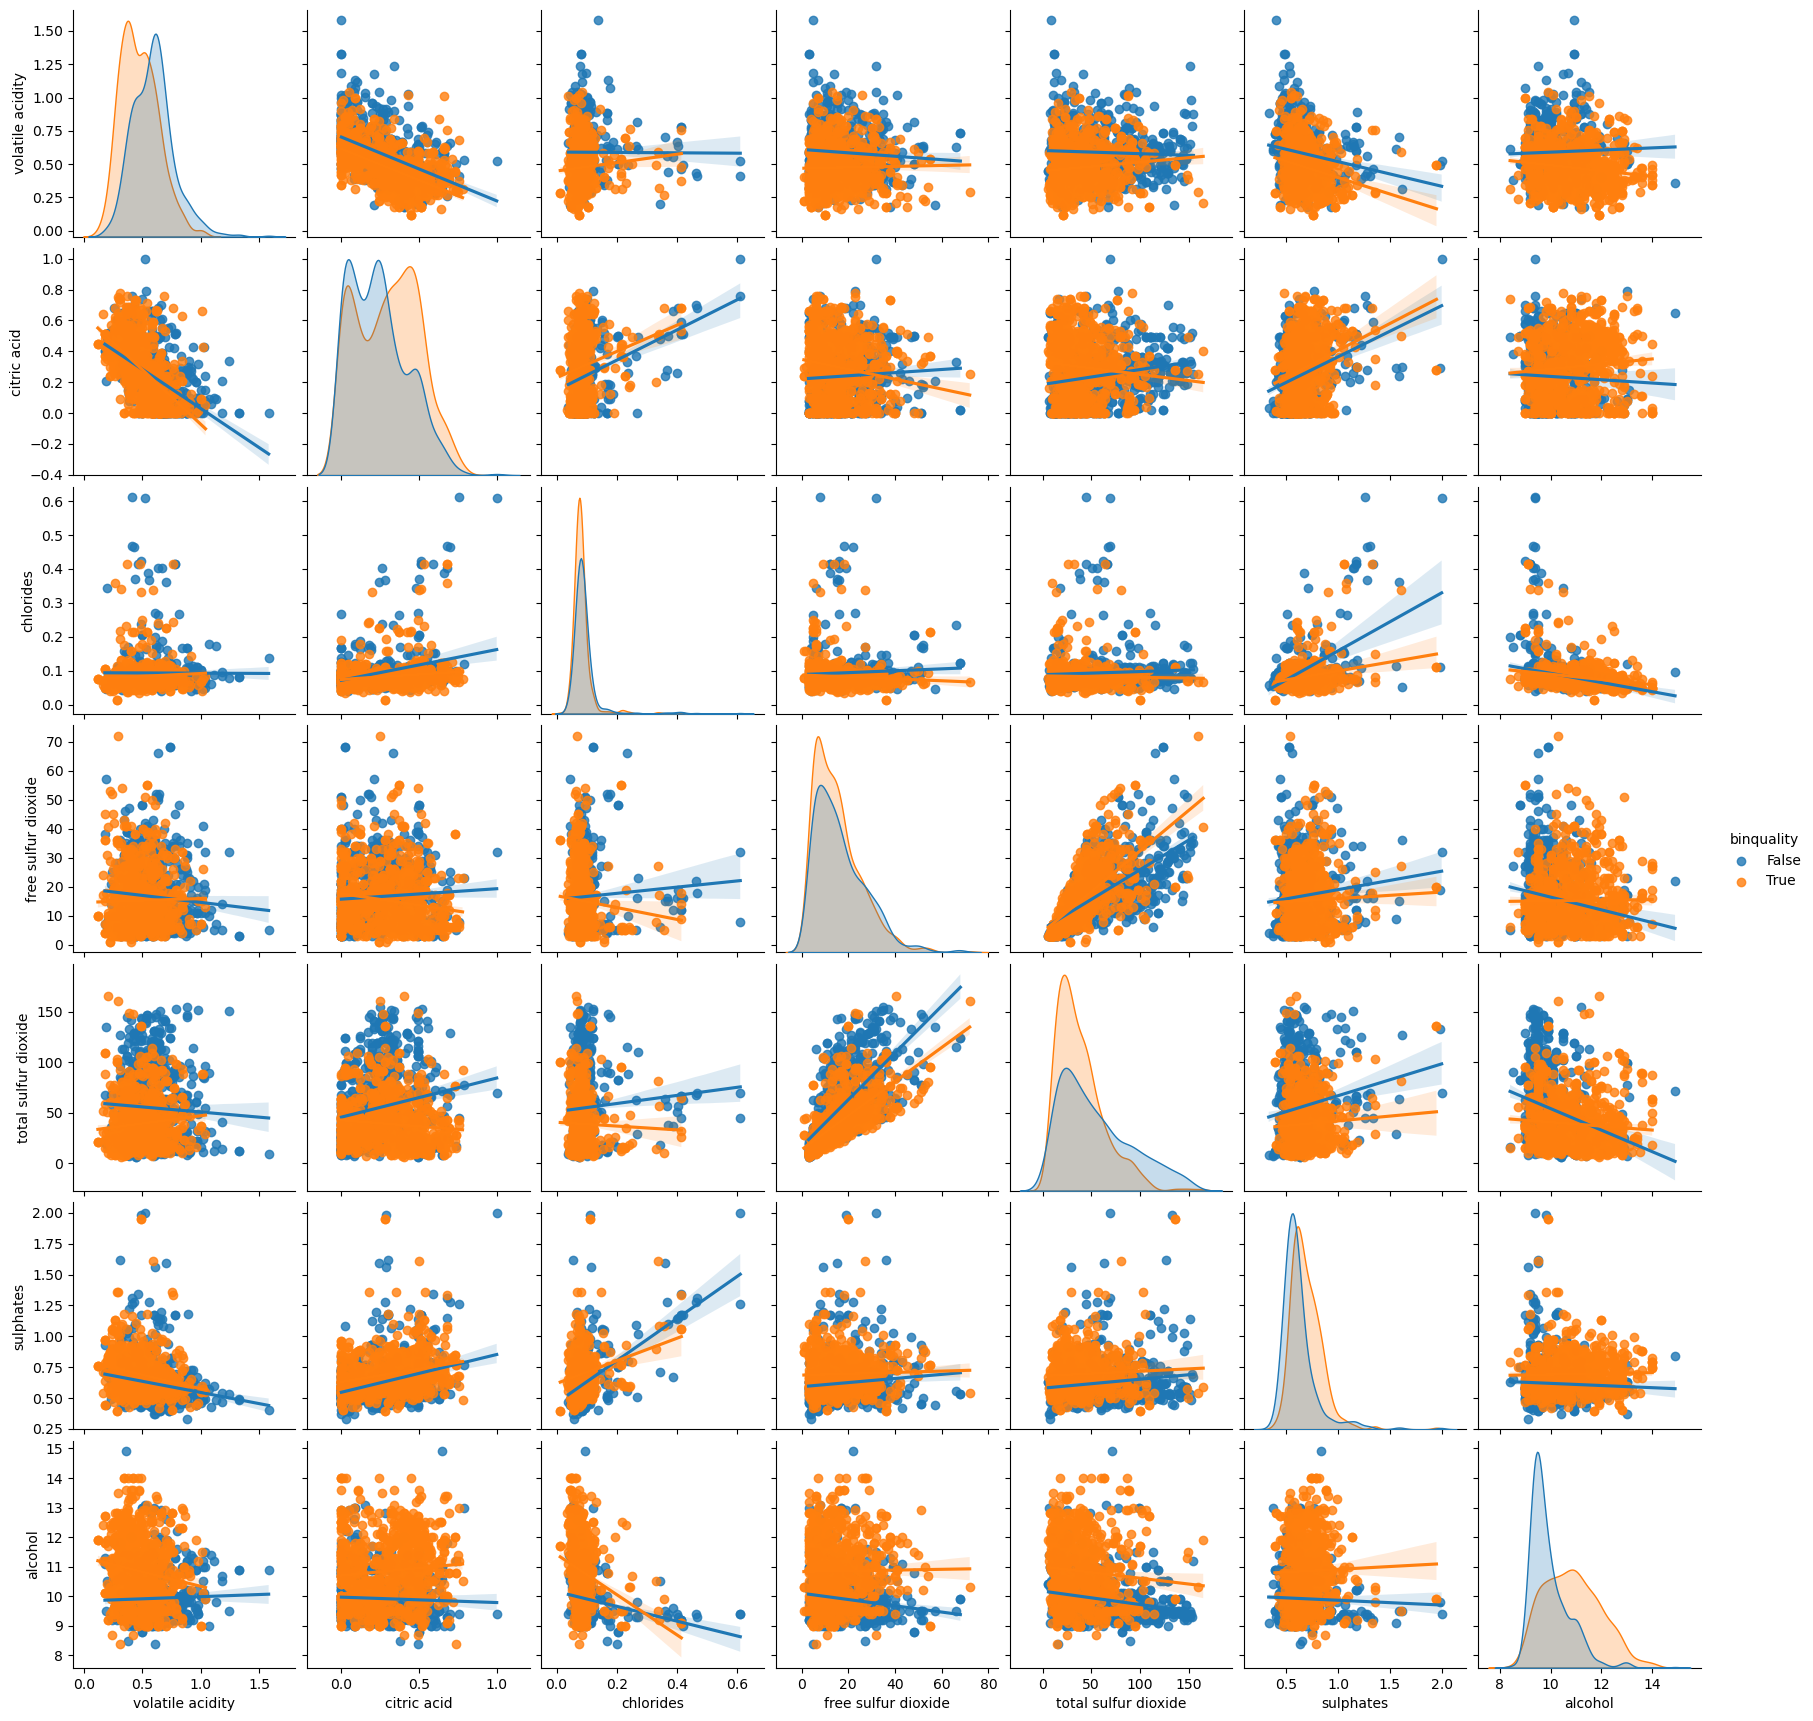

In [20]:
logit_ss_ivs = list(model.pvalues[model.pvalues<0.05].keys())
logit_ss_ivs.append('binquality')
sns.pairplot(df[logit_ss_ivs], kind='reg', hue='binquality')